<a href="https://colab.research.google.com/github/azzedbenj007/AgentGPT/blob/main/Maintenance_predict_Transfo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


📊 Rapport pour : temperature_oil
                                     SARIMAX Results                                      
Dep. Variable:                    temperature_oil   No. Observations:                 2000
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood               -5047.238
Date:                            Mon, 14 Jul 2025   AIC                          10114.475
Time:                                    14:01:34   BIC                          10170.359
Sample:                                01-01-2023   HQIC                         10135.008
                                     - 03-25-2023                                         
Covariance Type:                              opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
temperature_winding     0.7347      0.013     58.315      0.00

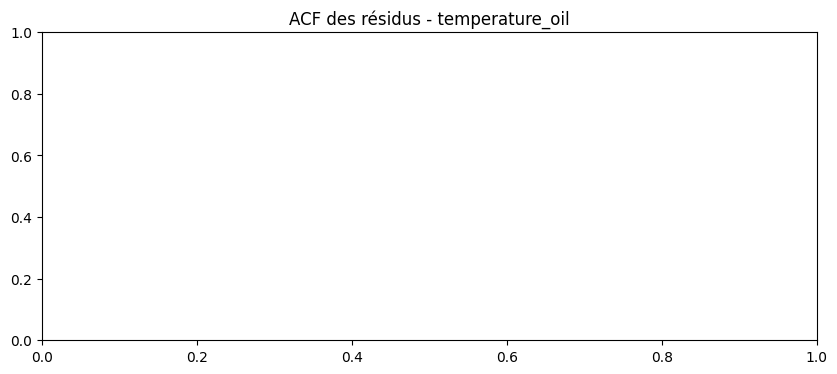

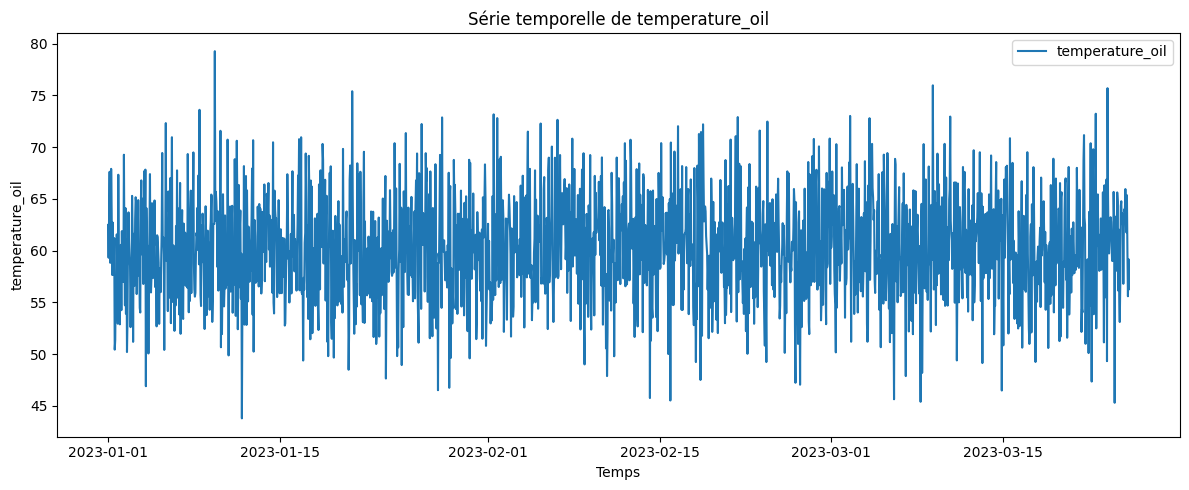

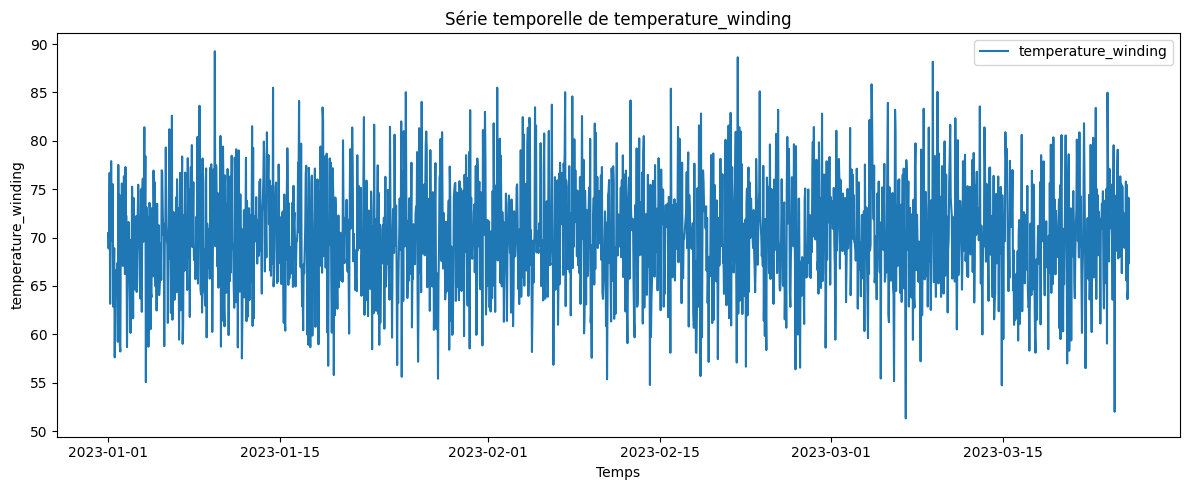

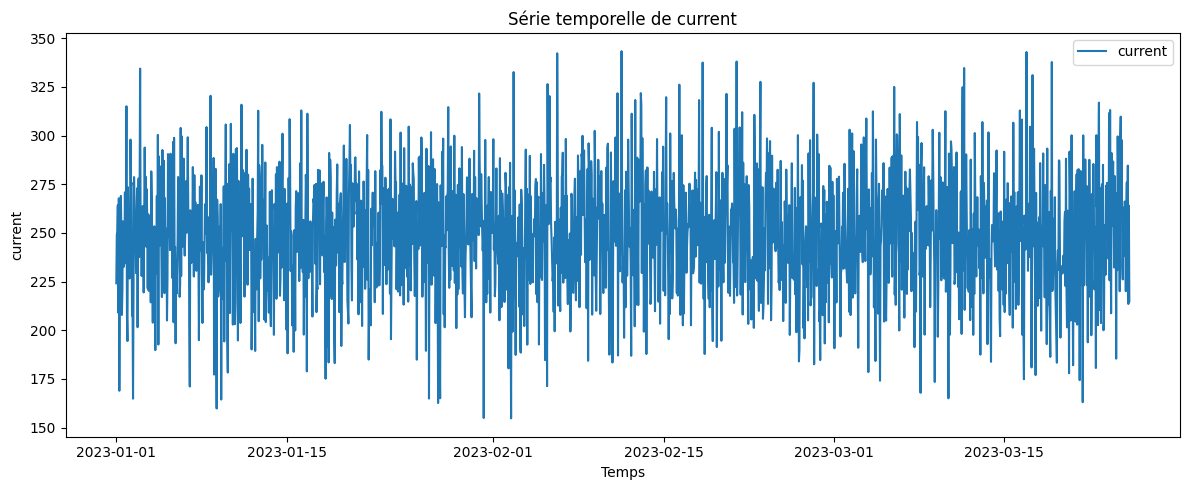

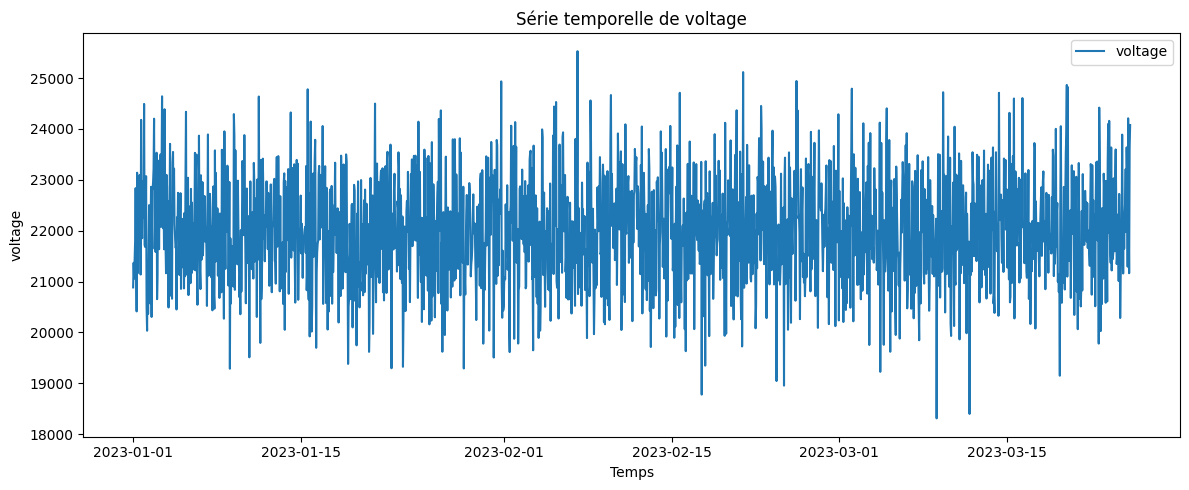

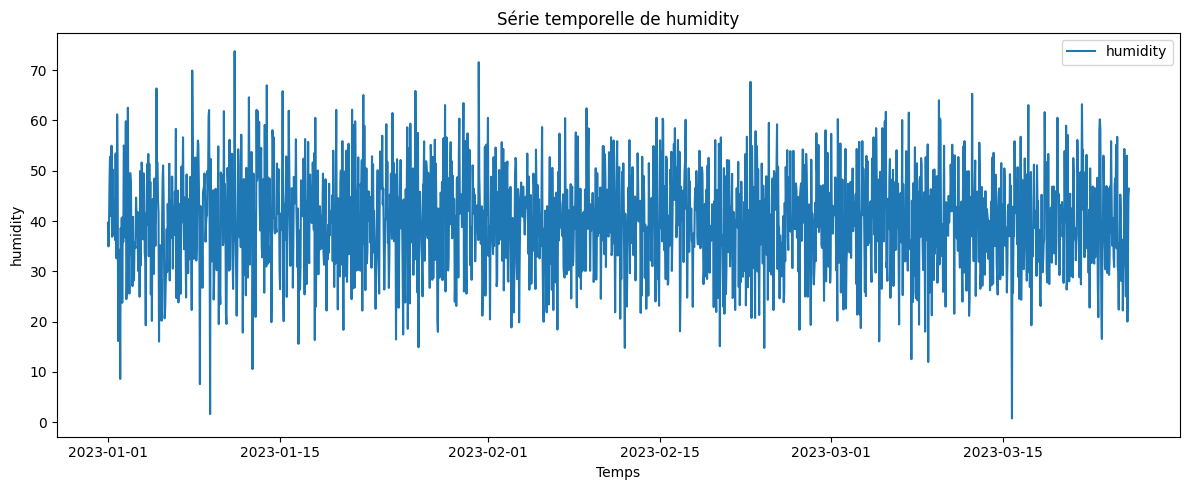

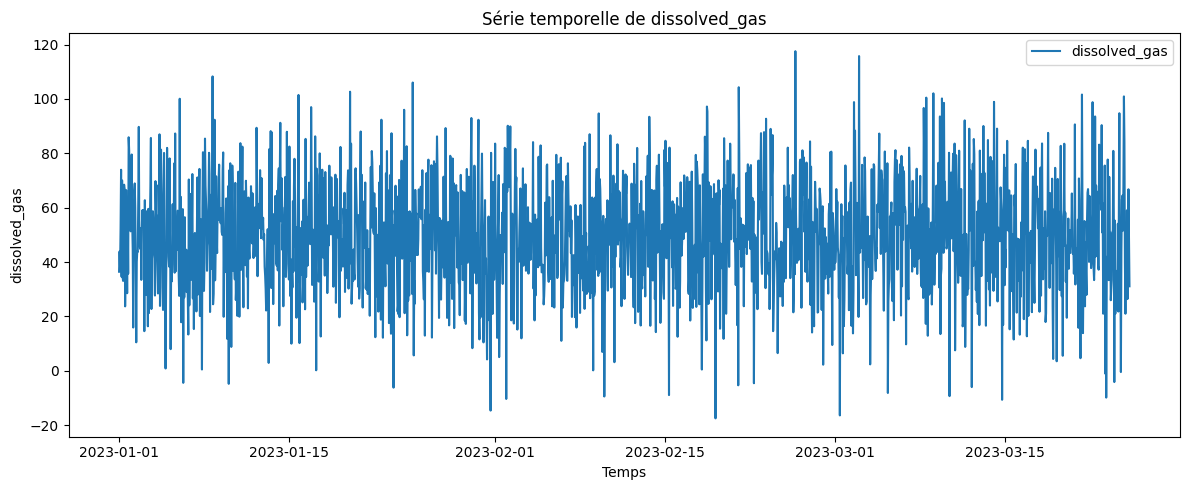


📊 Rapport pour : temperature_winding
                                     SARIMAX Results                                      
Dep. Variable:                temperature_winding   No. Observations:                 2000
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood               -5364.679
Date:                            Mon, 14 Jul 2025   AIC                          10749.358
Time:                                    14:01:42   BIC                          10805.241
Sample:                                01-01-2023   HQIC                         10769.890
                                     - 03-25-2023                                         
Covariance Type:                              opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
temperature_oil     0.9711      0.021     46.171      0.000       

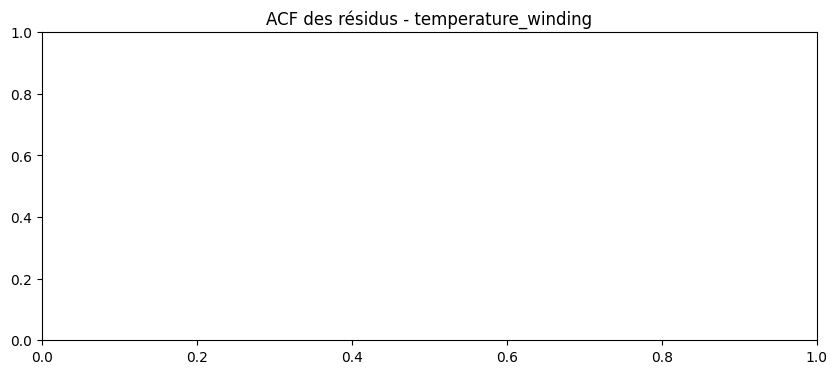

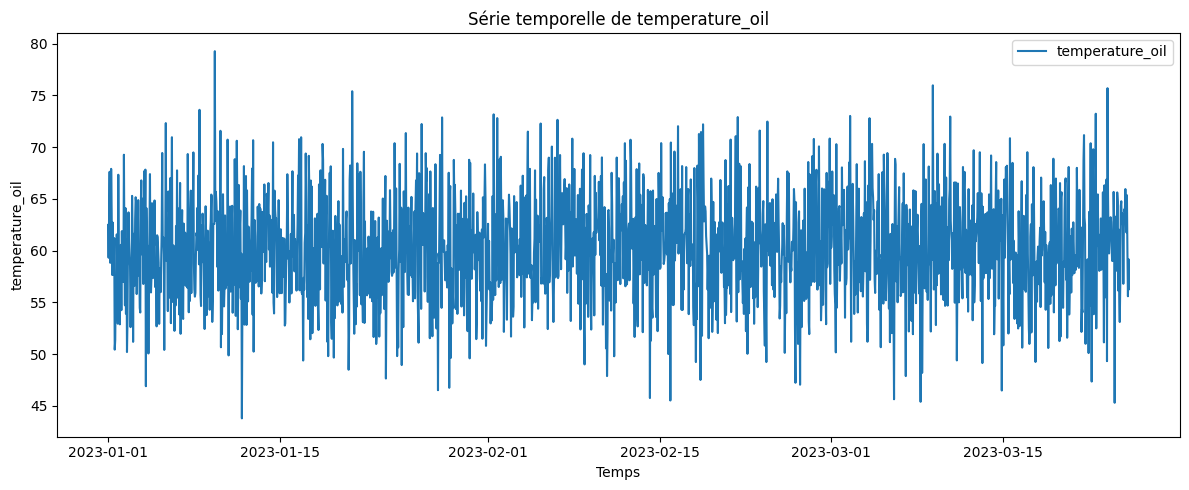

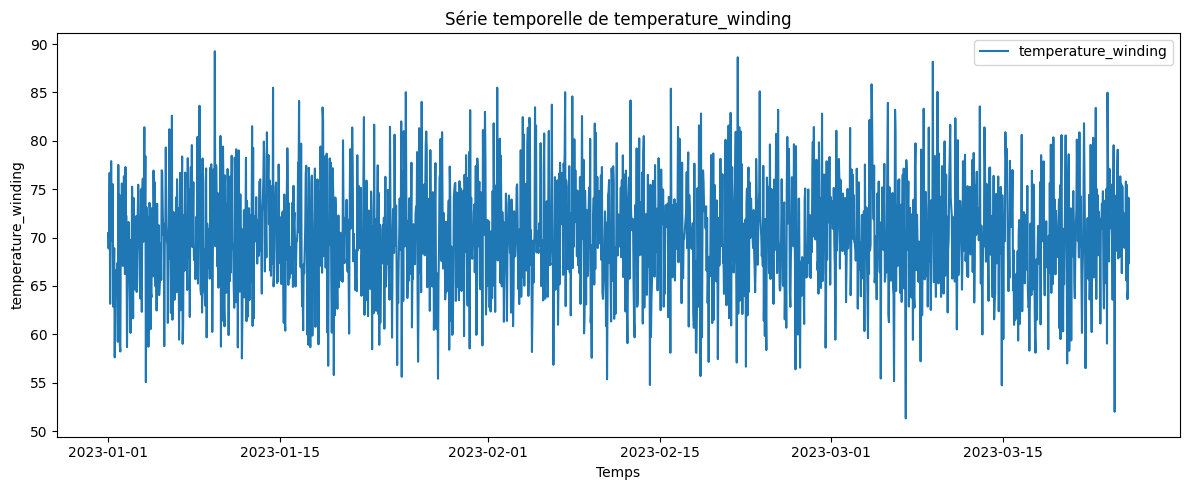

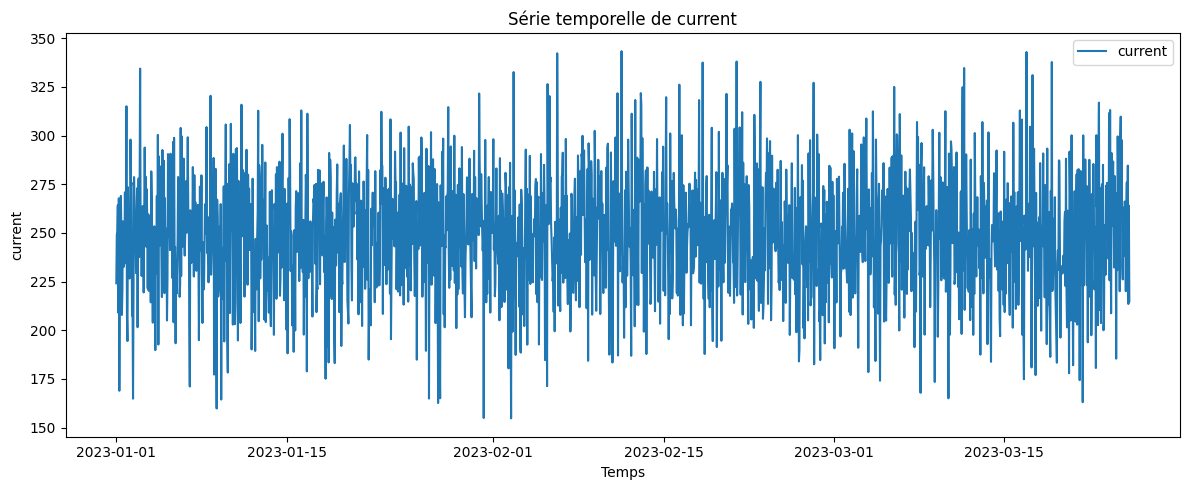

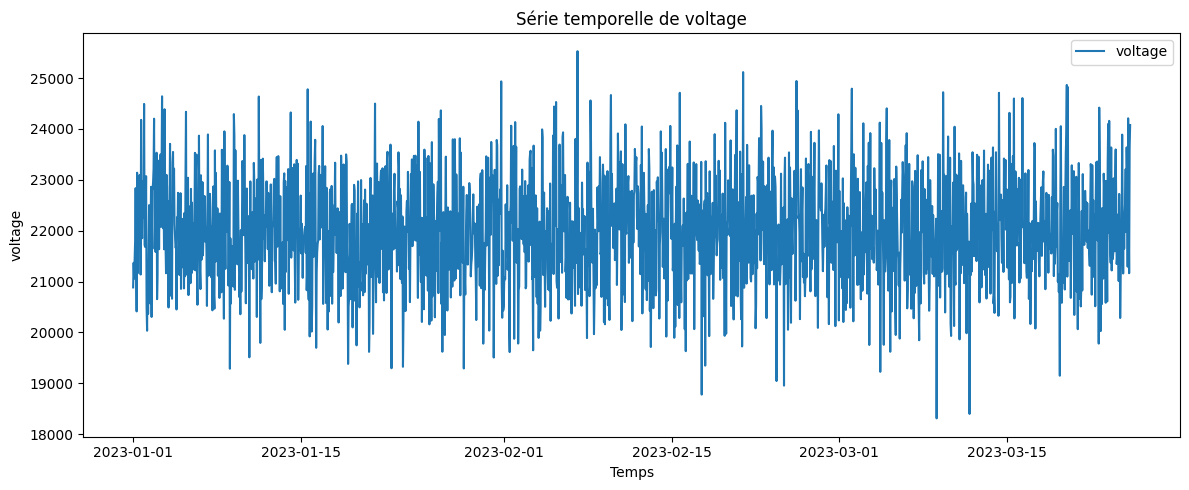

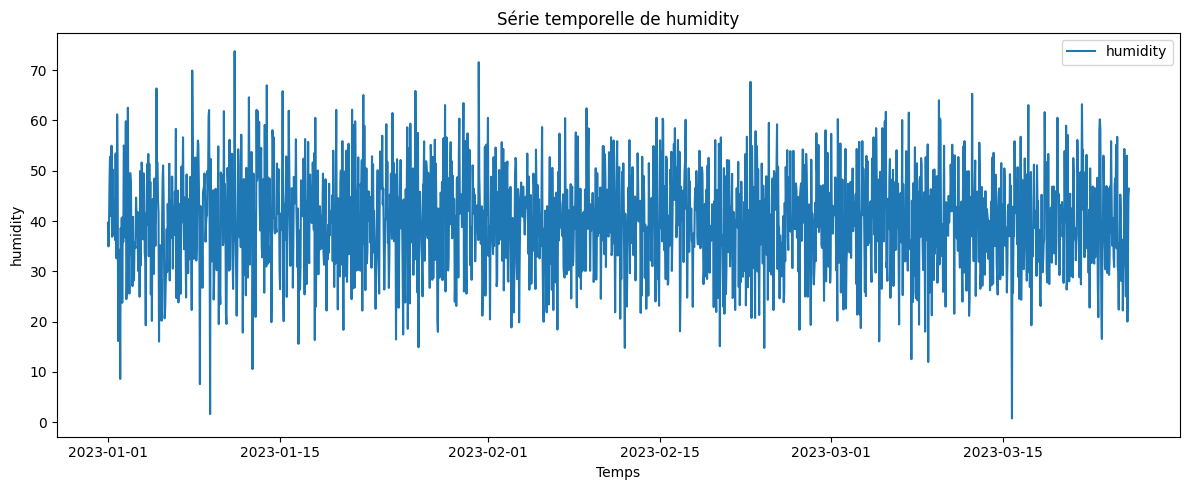

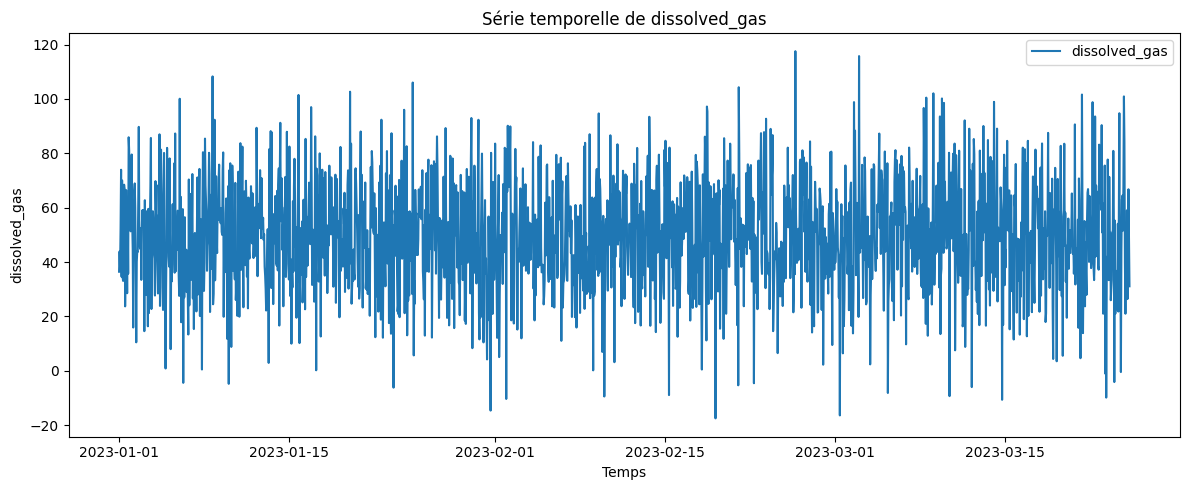


📊 Rapport pour : current
                                     SARIMAX Results                                      
Dep. Variable:                            current   No. Observations:                 2000
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood               -9600.894
Date:                            Mon, 14 Jul 2025   AIC                          19221.788
Time:                                    14:01:49   BIC                          19277.671
Sample:                                01-01-2023   HQIC                         19242.320
                                     - 03-25-2023                                         
Covariance Type:                              opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
temperature_oil         0.5685      0.275      2.066      0.039       

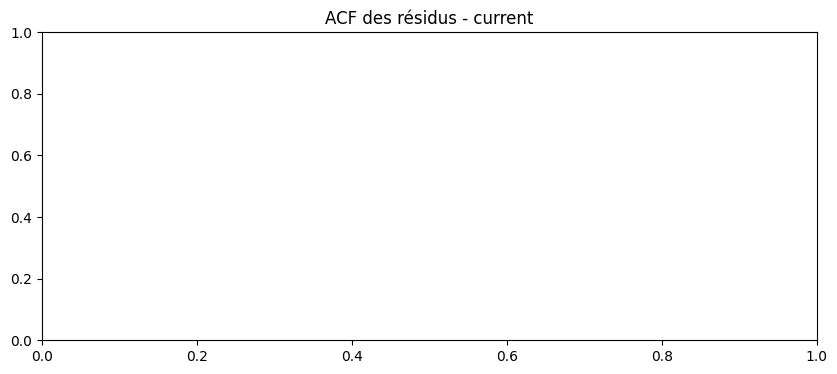

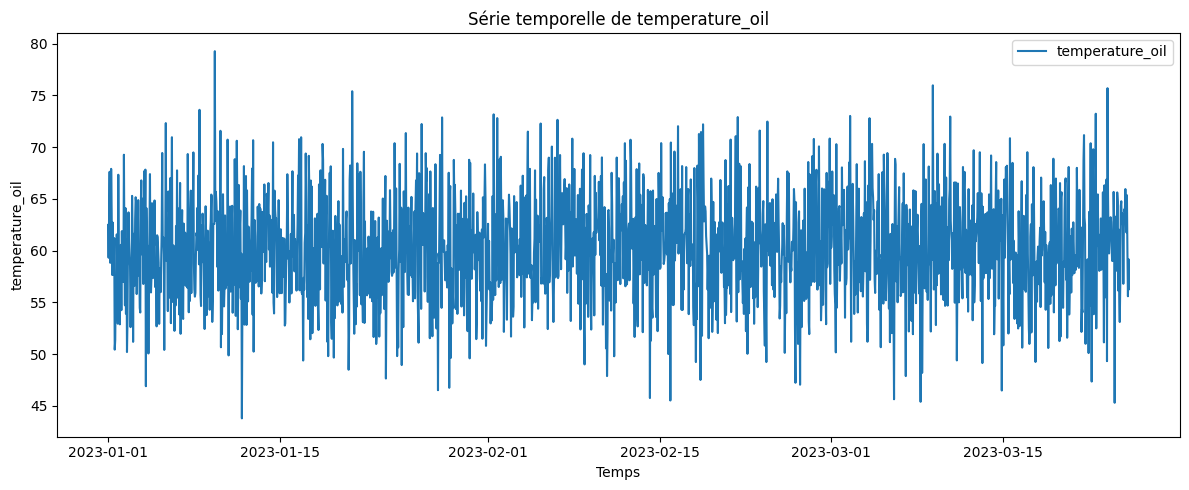

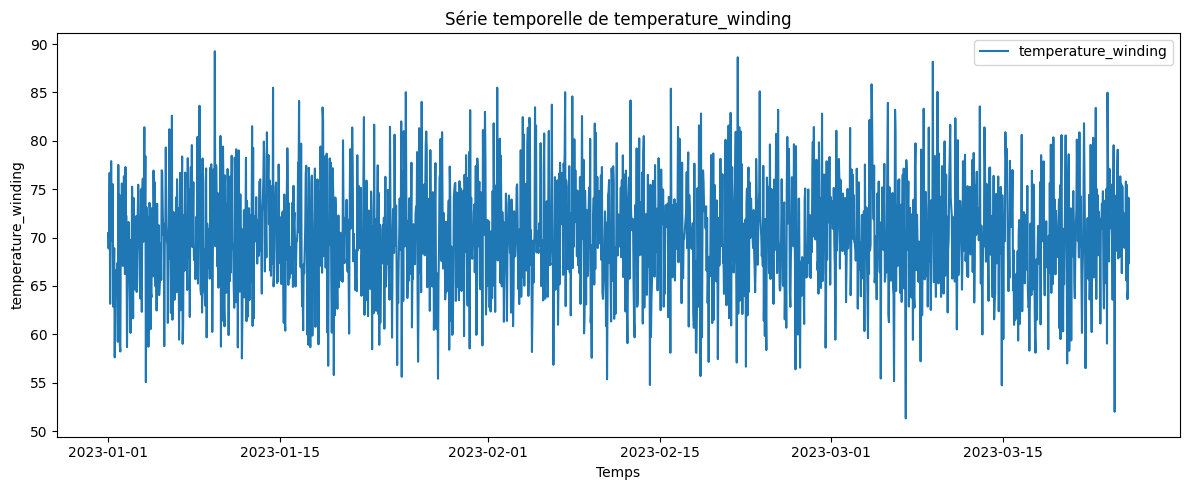

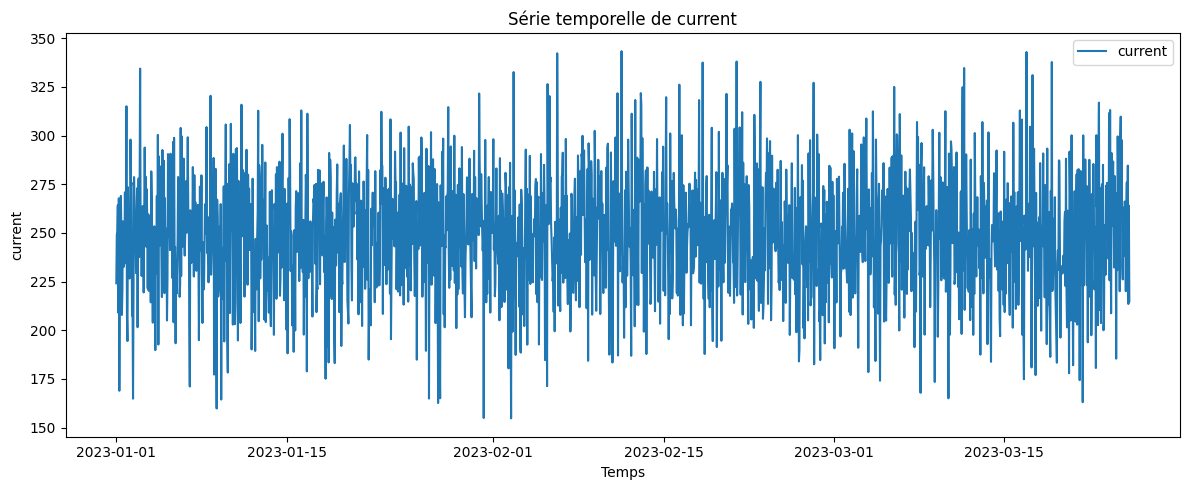

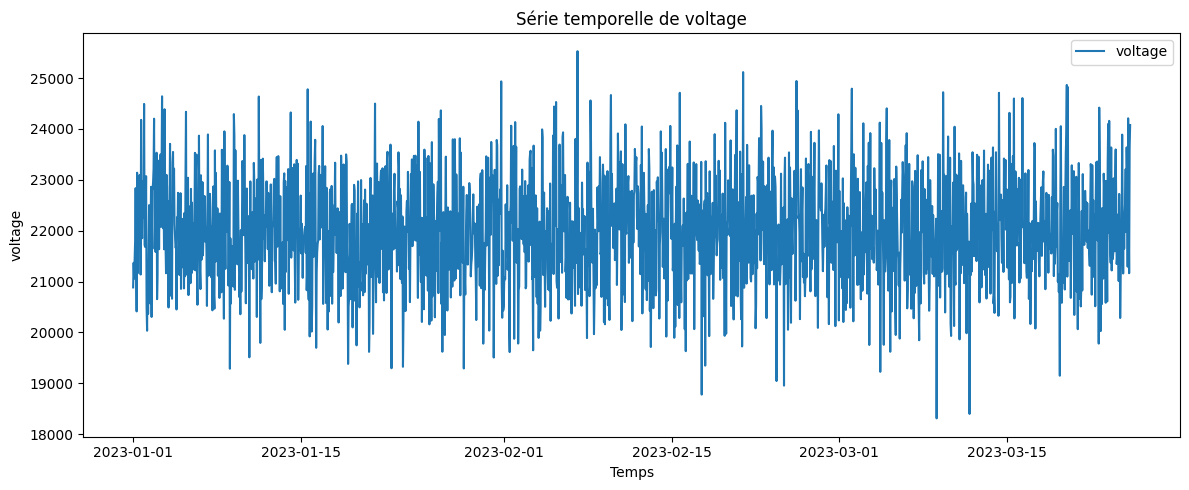

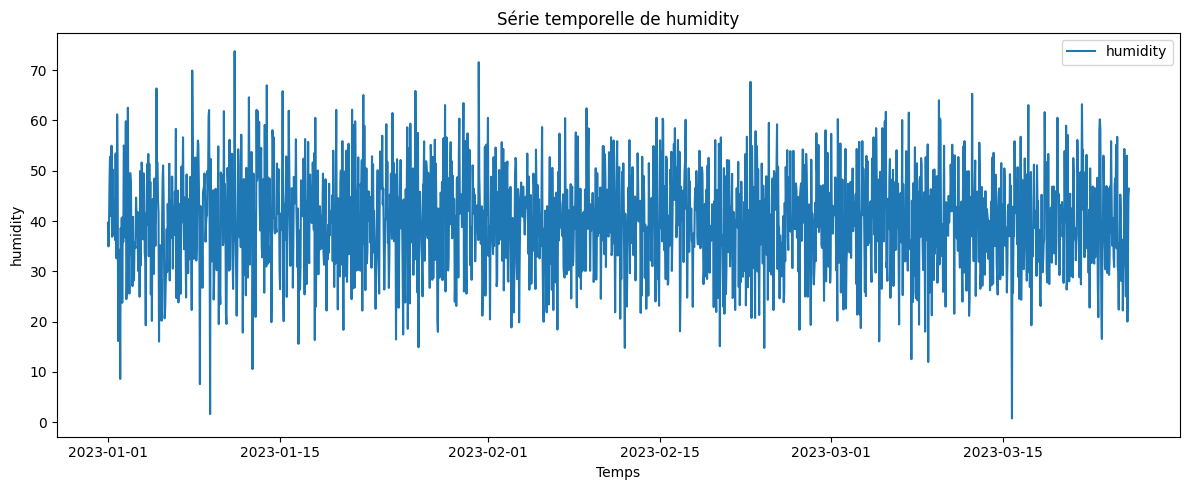

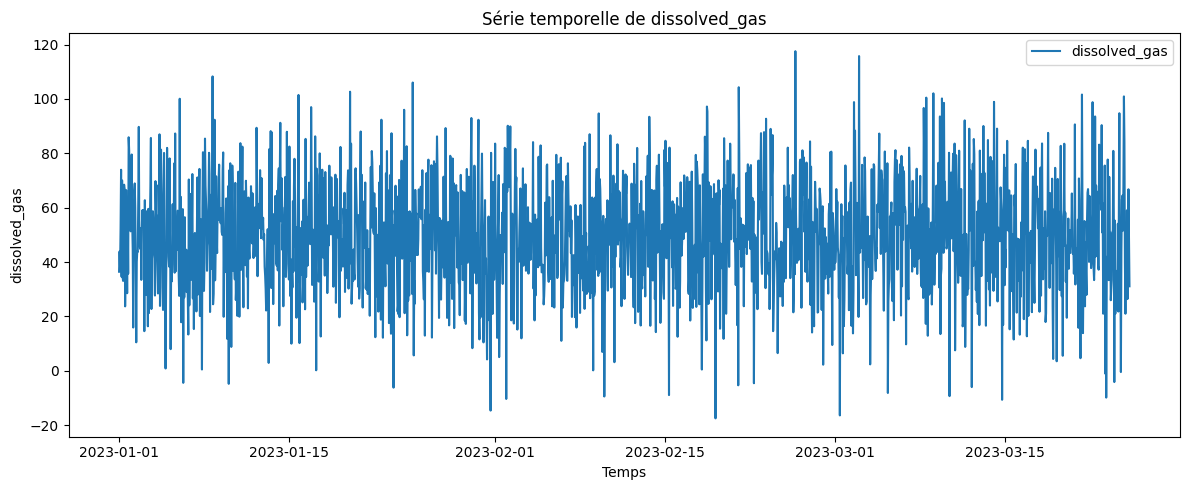


📊 Rapport pour : voltage
                                     SARIMAX Results                                      
Dep. Variable:                            voltage   No. Observations:                 2000
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood              -16744.094
Date:                            Mon, 14 Jul 2025   AIC                          33508.188
Time:                                    14:01:56   BIC                          33564.072
Sample:                                01-01-2023   HQIC                         33528.721
                                     - 03-25-2023                                         
Covariance Type:                              opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
temperature_oil        29.5833     12.043      2.457      0.014       

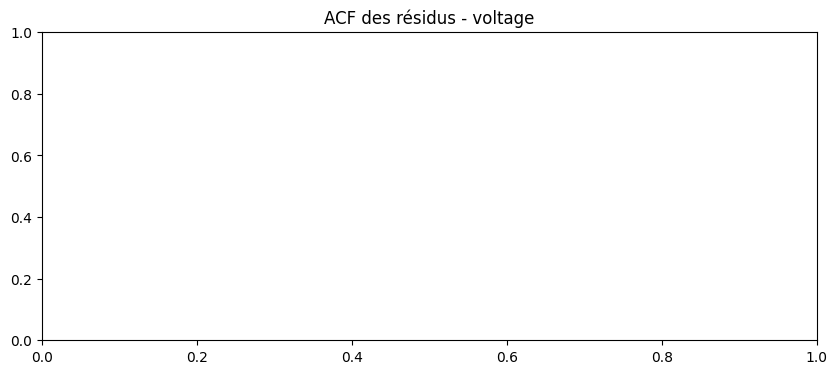

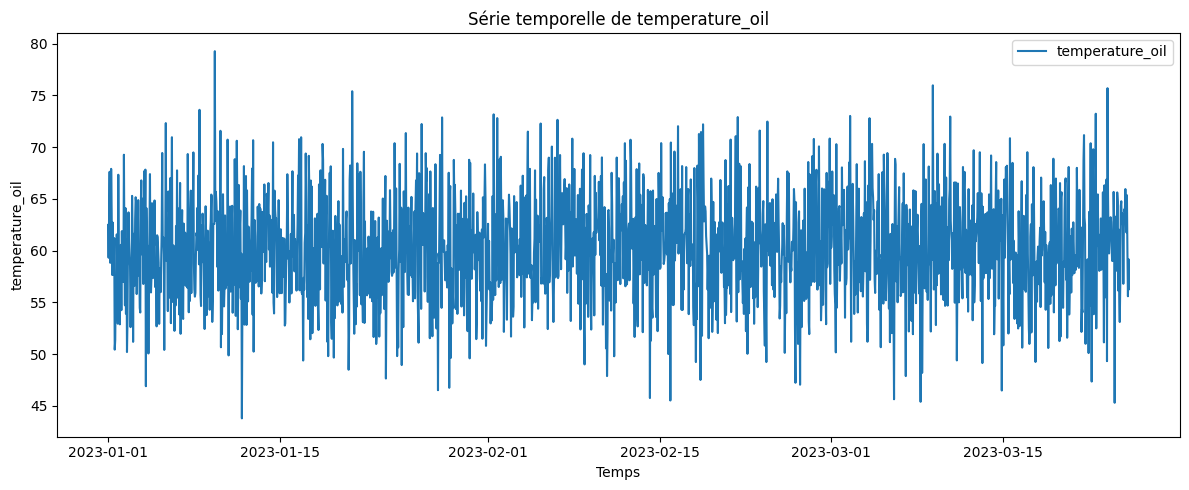

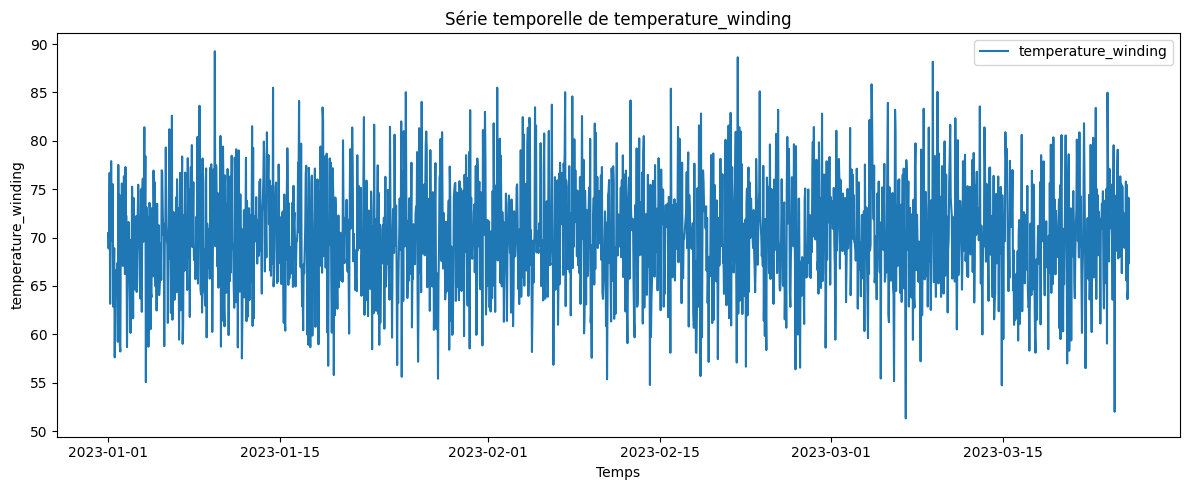

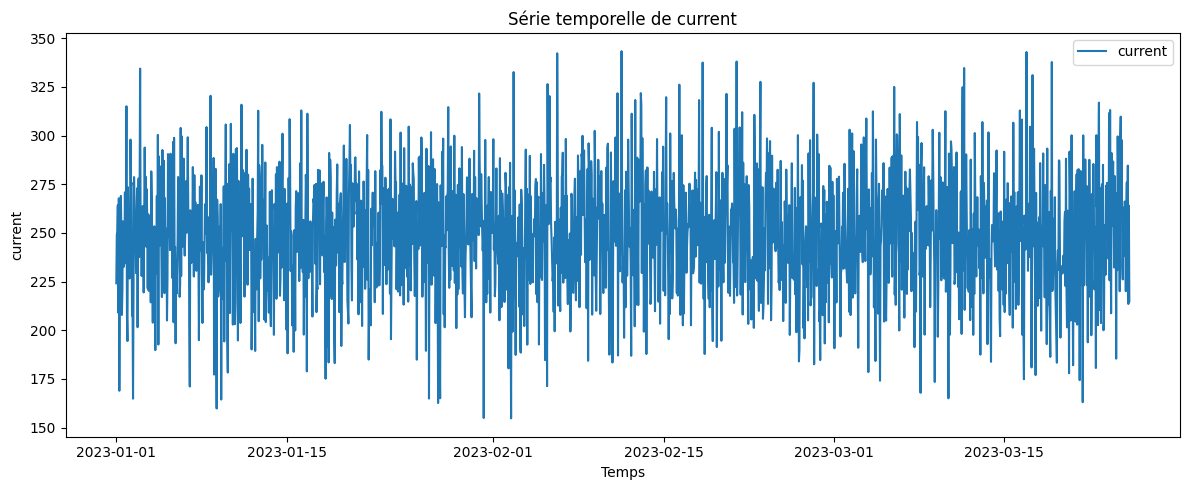

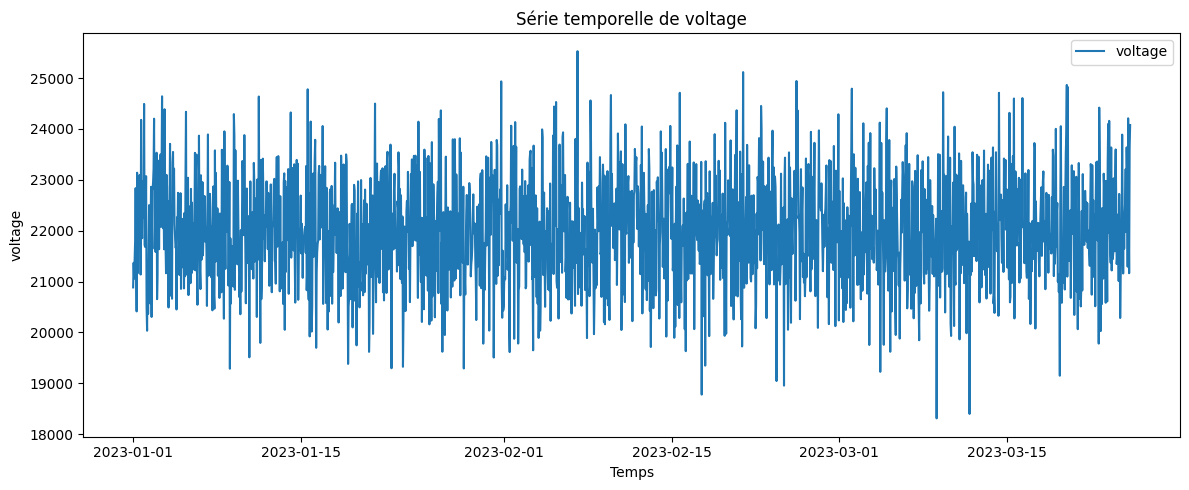

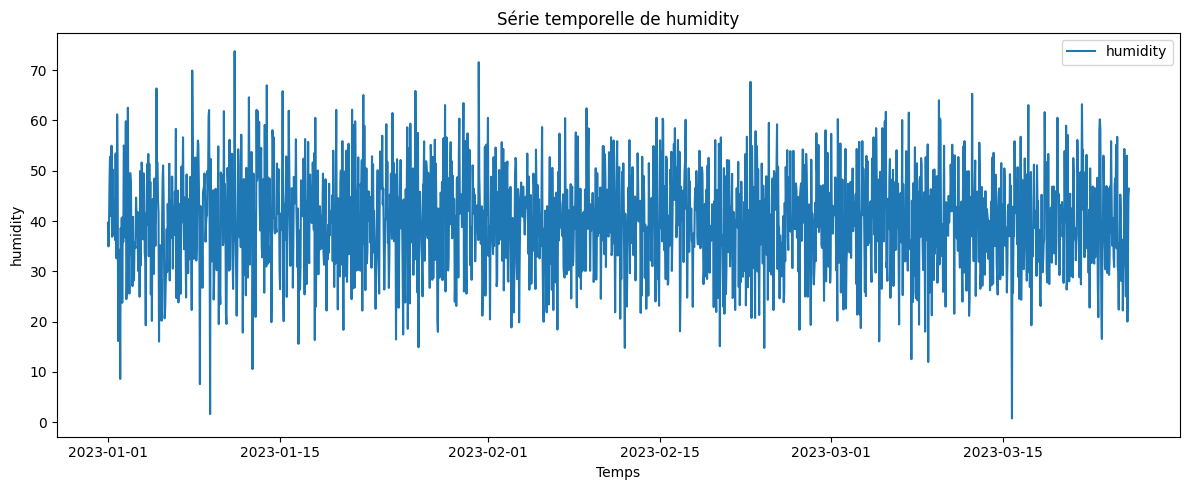

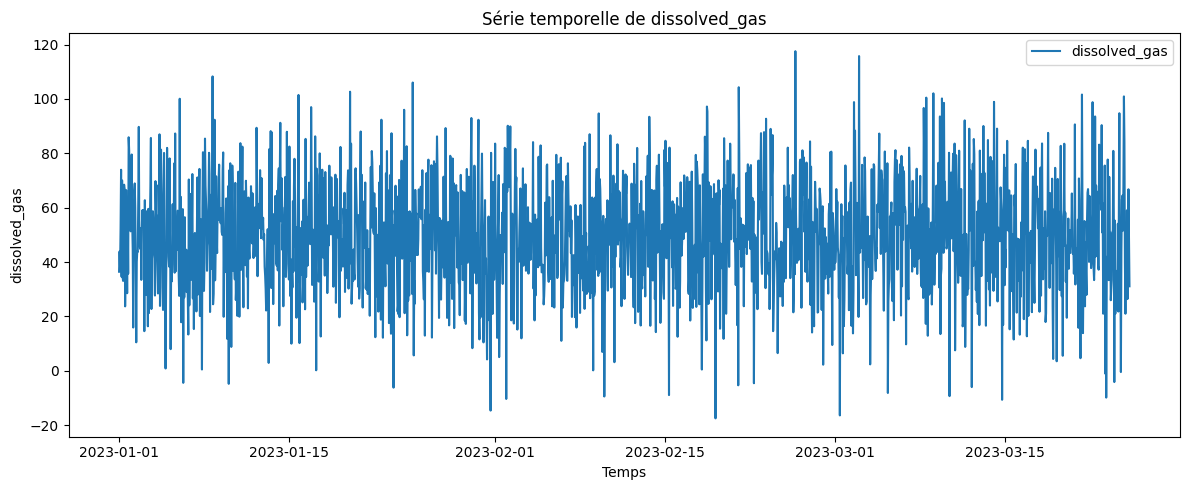


📊 Rapport pour : humidity
                                     SARIMAX Results                                      
Dep. Variable:                           humidity   No. Observations:                 2000
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood               -7505.370
Date:                            Mon, 14 Jul 2025   AIC                          15030.741
Time:                                    14:02:03   BIC                          15086.624
Sample:                                01-01-2023   HQIC                         15051.273
                                     - 03-25-2023                                         
Covariance Type:                              opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
temperature_oil        -0.1227      0.106     -1.159      0.246      

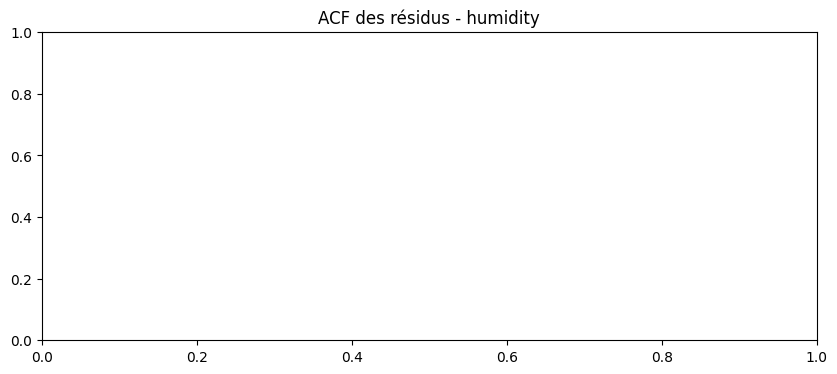

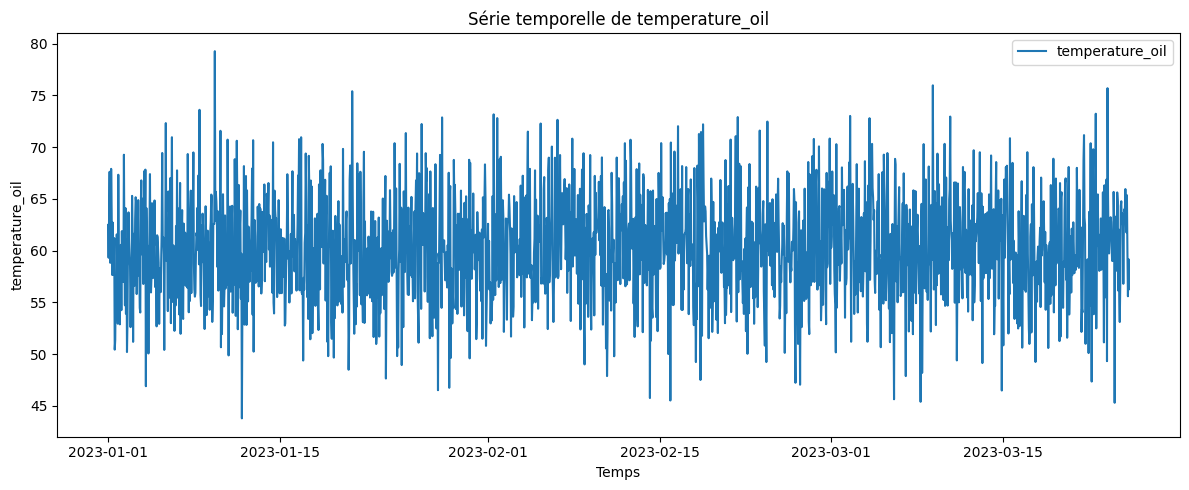

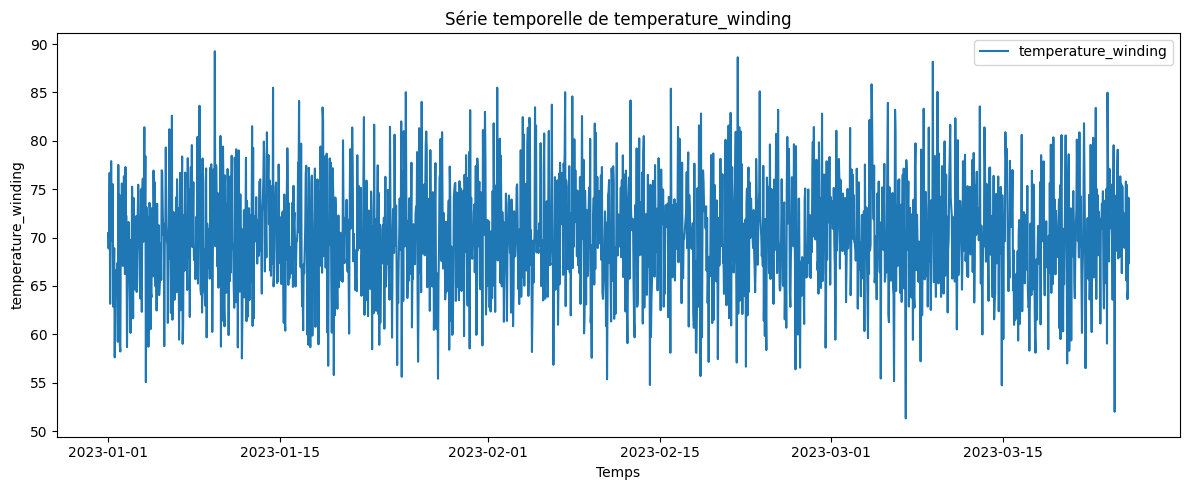

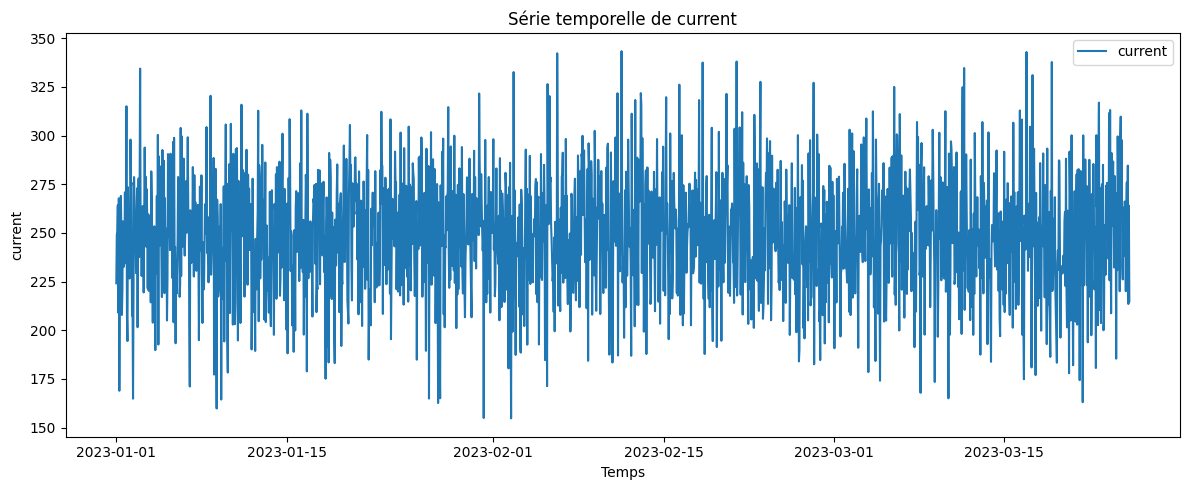

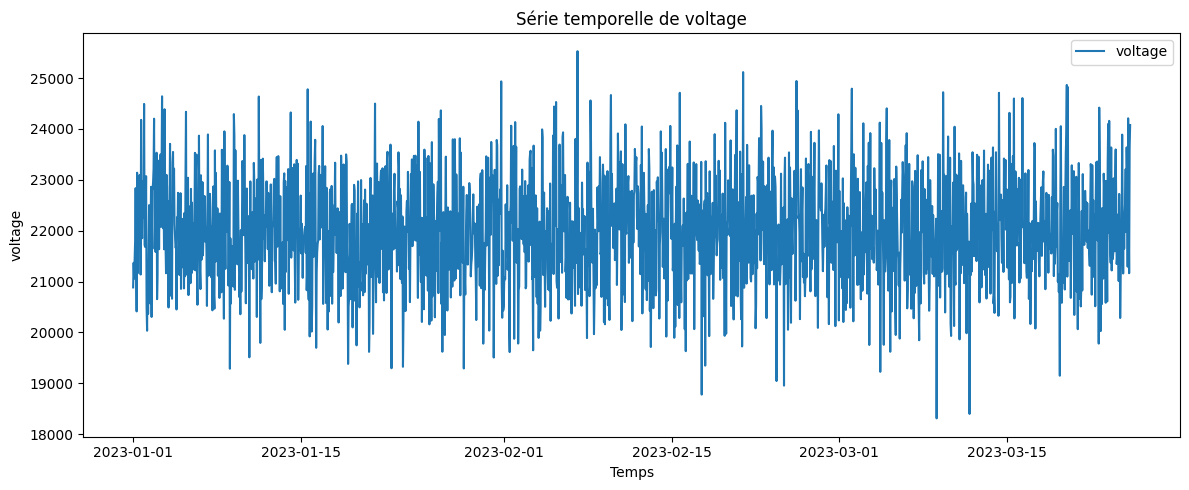

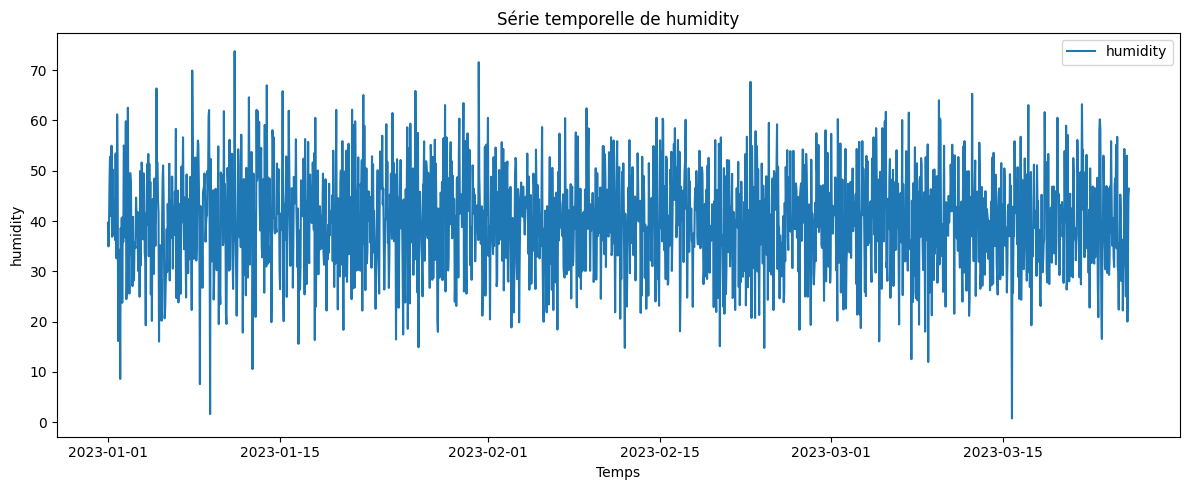

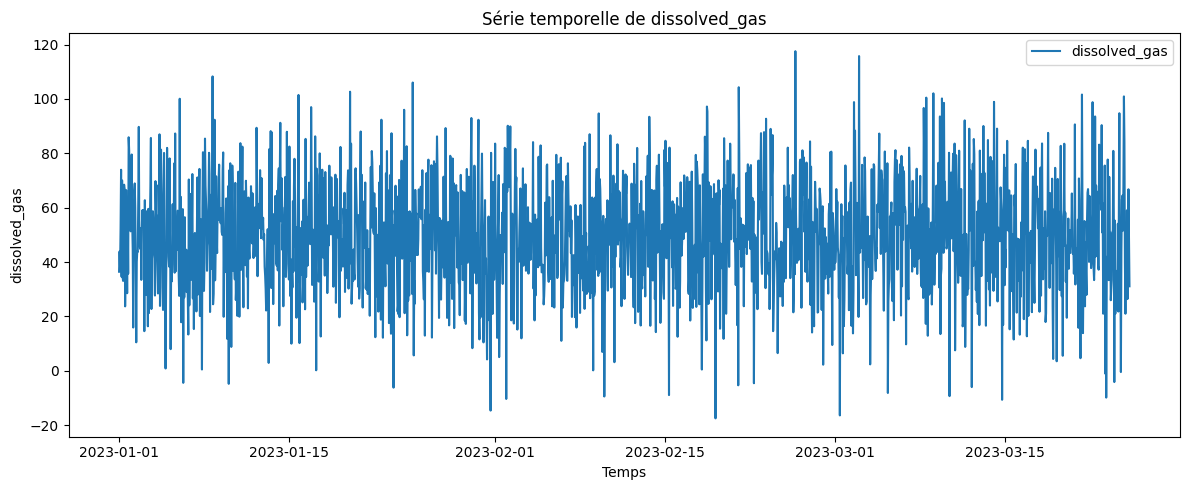


📊 Rapport pour : dissolved_gas
                                     SARIMAX Results                                      
Dep. Variable:                      dissolved_gas   No. Observations:                 2000
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood               -8827.496
Date:                            Mon, 14 Jul 2025   AIC                          17674.992
Time:                                    14:02:10   BIC                          17730.875
Sample:                                01-01-2023   HQIC                         17695.524
                                     - 03-25-2023                                         
Covariance Type:                              opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
temperature_oil         0.7602      0.199      3.818      0.000 

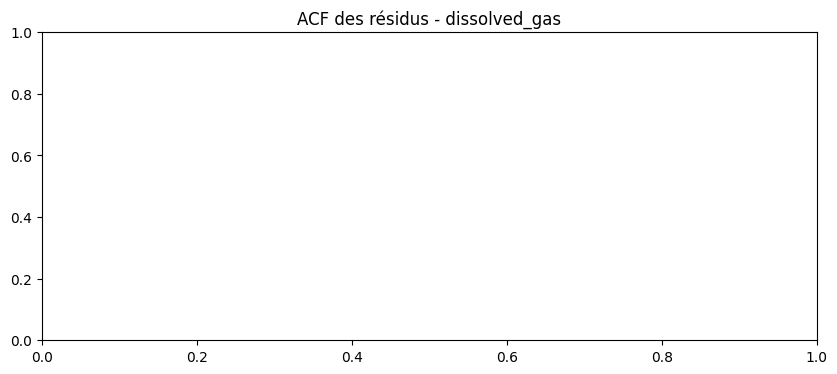

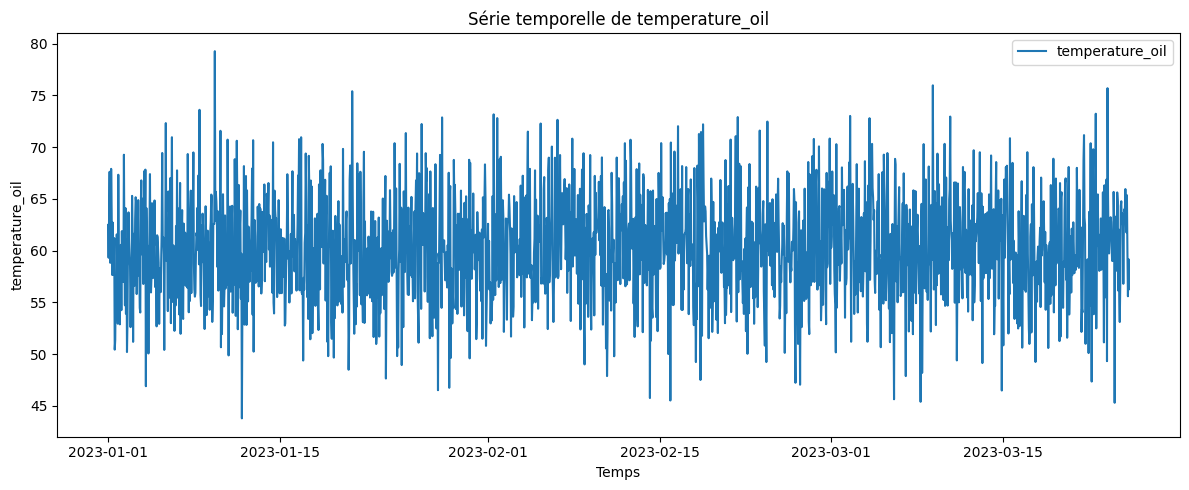

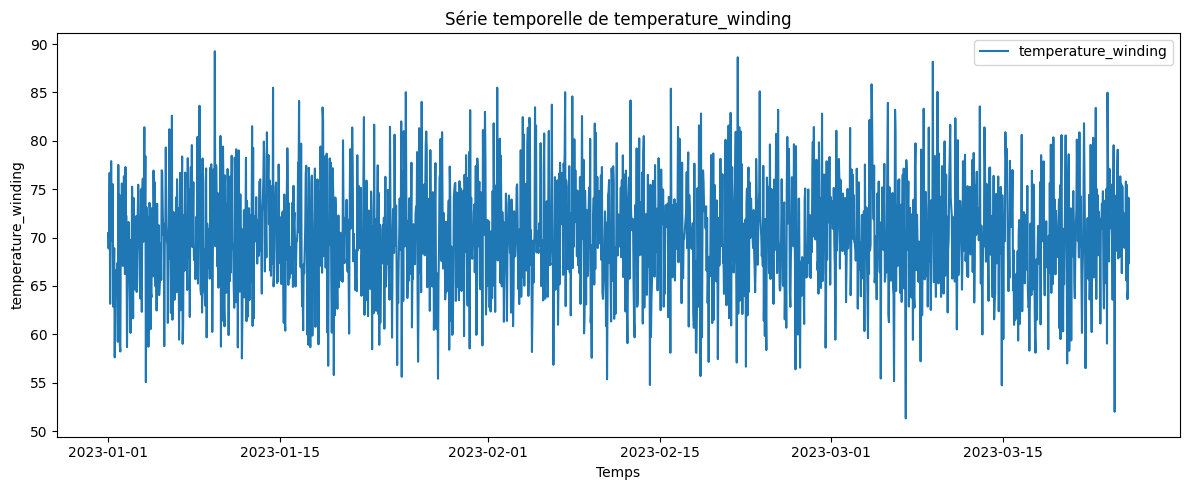

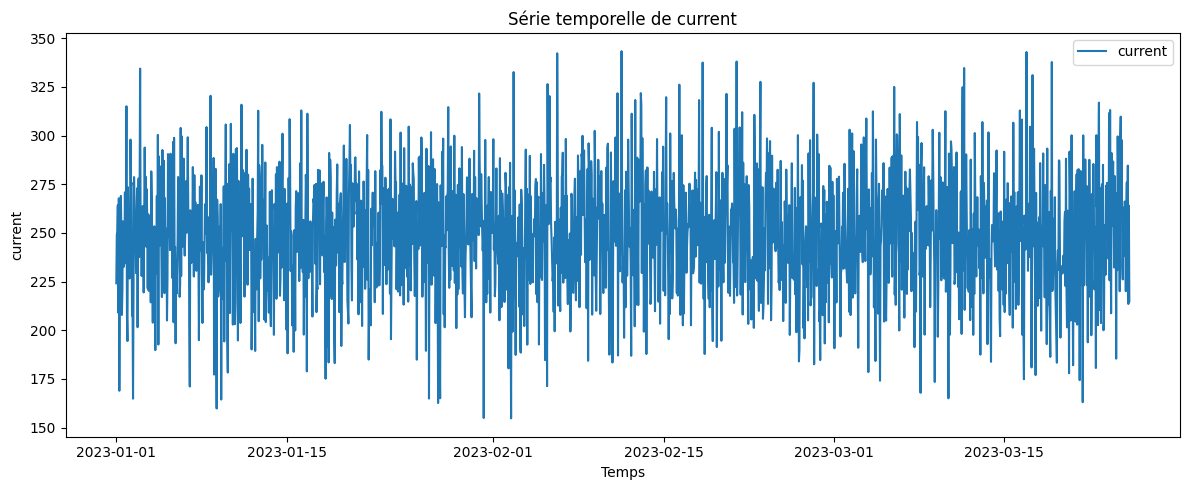

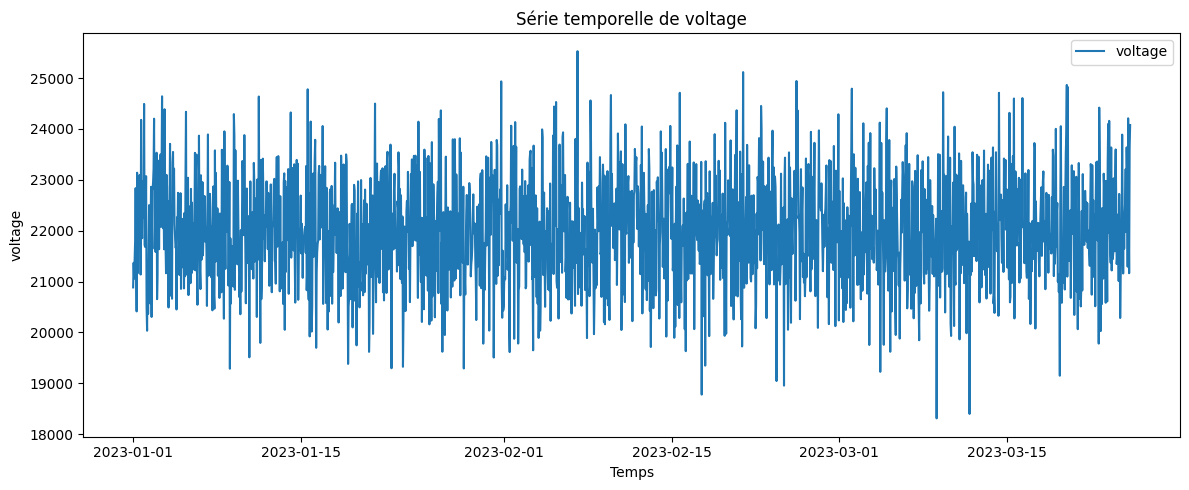

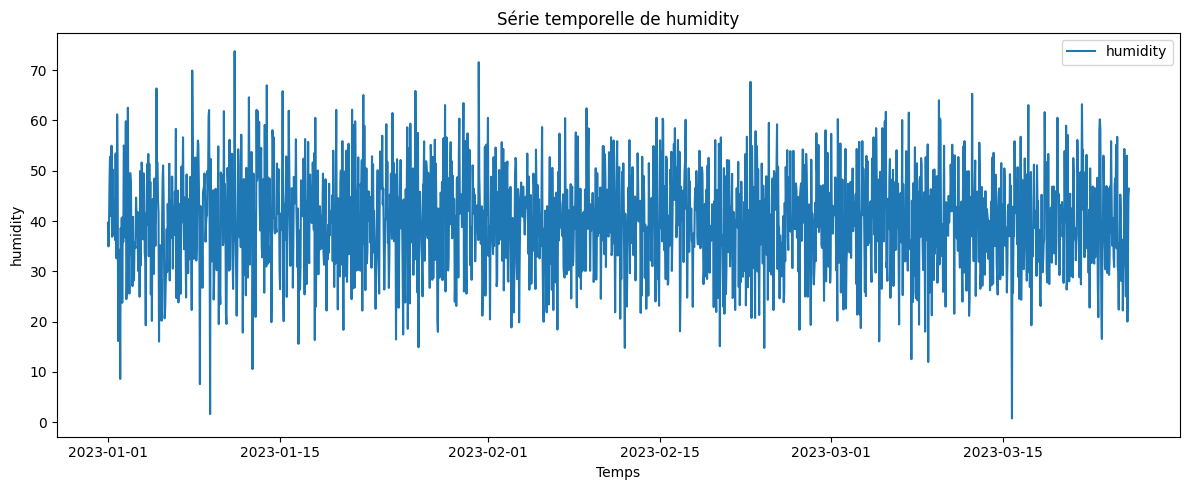

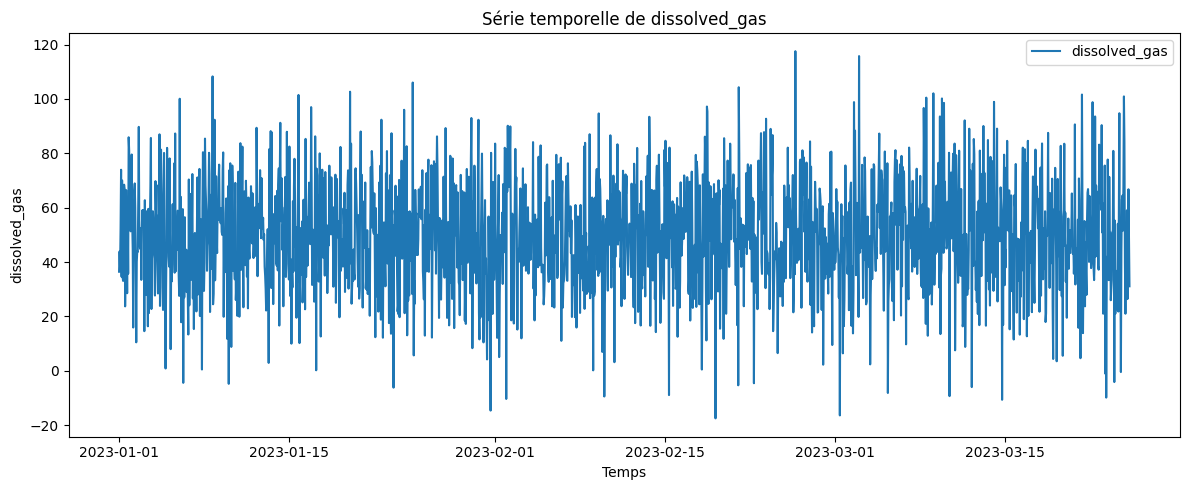


✅ Tous les rapports SARIMAX ont été générés dans 'sarimax_reports/'


In [5]:
# sarimax_report.py

import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Configuration
model_dir = 'trained_models'
data_file = 'datac.csv'
time_column = 'timestamp'
all_numeric_columns = [
    'temperature_oil', 'temperature_winding', 'current',
    'voltage', 'humidity', 'dissolved_gas'
]

# Chargement des données
df = pd.read_csv(data_file, parse_dates=[time_column])
df.set_index(time_column, inplace=True)
df.sort_index(inplace=True)
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

# Créer un dossier pour les rapports si nécessaire
os.makedirs("sarimax_reports", exist_ok=True)

# Générer un rapport pour chaque modèle
for col in all_numeric_columns:
    model_path = os.path.join(model_dir, f'model_{col}.pkl')

    if not os.path.exists(model_path):
        print(f"❌ Modèle manquant pour {col}")
        continue

    print(f"\n📊 Rapport pour : {col}")
    with open(model_path, 'rb') as f:
        model_fit = pickle.load(f)

    # Résumé statistique
    summary_text = model_fit.summary().as_text()
    print(summary_text)

    # AIC / BIC
    aic = model_fit.aic
    bic = model_fit.bic
    print(f"\n📈 AIC: {aic:.2f} | BIC: {bic:.2f}")

    # Résidus
    residuals = model_fit.resid
    plt.figure(figsize=(10, 4))
    plt.title(f"ACF des résidus - {col}")
    plot_acf(residuals, lags=40)
    plt.tight_layout()
    plt.savefig(f"sarimax_reports/acf_residuals_{col}.png")
    plt.close()

    # Sauvegarder résumé dans un fichier texte
    with open(f'sarimax_reports/report_{col}.txt', 'w') as out_file:
        out_file.write(f"Résumé statistique du modèle SARIMAX pour {col} :\n")
        out_file.write(summary_text)
        out_file.write(f"\n\nAIC: {aic:.2f} | BIC: {bic:.2f}\n")
    for col in all_numeric_columns:
        # Visualiser la série temporelle
      plt.figure(figsize=(12, 5))
      plt.plot(df.index, df[col], label=col)
      plt.title(f"Série temporelle de {col}")
      plt.xlabel("Temps")
      plt.ylabel(col)
      plt.legend()
      plt.tight_layout()
      plt.savefig(f"sarimax_reports/time_series_{col}.png")
      plt.show()
      plt.close()

    # Puis le reste du traitement comme avant ...


print("\n✅ Tous les rapports SARIMAX ont été générés dans 'sarimax_reports/'")


In [1]:
# train_models.py

import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pickle
import warnings
import os

warnings.filterwarnings("ignore")

print("--- Starting Dynamic Model Training ---")

# --- Configuration ---
file_path = 'datac.csv'

# Define ALL columns that could potentially be a target or a feature.
# We will exclude the 'fault' column as it seems categorical.
all_numeric_columns = [
    'temperature_oil',
    'temperature_winding',
    'current',
    'voltage',
    'humidity',
    'dissolved_gas'
]
time_column = 'timestamp'

# The directory where models will be saved
model_dir = 'trained_models'
# --------------------

# Create the model directory if it doesn't exist
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f"Created directory: '{model_dir}'")

# 1. Load and prepare the entire dataset
print(f"Loading data from '{file_path}'...")
try:
    df = pd.read_csv(file_path, usecols=[time_column] + all_numeric_columns)
except (FileNotFoundError, ValueError) as e:
    print(f"Error loading data: {e}")
    exit()

df[time_column] = pd.to_datetime(df[time_column])
df = df.set_index(time_column).sort_index()

# Handle missing values
if df.isnull().values.any():
    df.fillna(method='ffill', inplace=True)
    df.fillna(method='bfill', inplace=True)
print("Data preparation complete.")


# 2. Loop through each target column to train and save a model
for target_column in all_numeric_columns:
    print(f"\n--- Training model for: {target_column} ---")

    # The target variable (y) is the current column in the loop
    y_train = df[target_column]

    # The exogenous variables (exog) are all OTHER numeric columns
    exog_columns = [col for col in all_numeric_columns if col != target_column]
    exog_train = df[exog_columns]

    print(f"Target: {target_column}")
    print(f"Features: {exog_columns}")

    # Define SARIMAX model parameters
    my_order = (1, 1, 1)
    my_seasonal_order = (1, 1, 1, 24)

    # Train the SARIMAX model
    print(f"Training SARIMAX for {target_column}... (This may take a few minutes)")
    model = SARIMAX(y_train, exog=exog_train, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit(disp=False)
    print("Training complete.")

    # 3. Save the trained model to a unique file
    model_save_path = os.path.join(model_dir, f'model_{target_column}.pkl')
    print(f"Saving model to '{model_save_path}'...")
    with open(model_save_path, 'wb') as pkl_file:
        pickle.dump(model_fit, pkl_file)

print("\n--- All models have been successfully trained and saved! ---")

--- Starting Dynamic Model Training ---
Created directory: 'trained_models'
Loading data from 'datac.csv'...
Data preparation complete.

--- Training model for: temperature_oil ---
Target: temperature_oil
Features: ['temperature_winding', 'current', 'voltage', 'humidity', 'dissolved_gas']
Training SARIMAX for temperature_oil... (This may take a few minutes)
--- Starting Dynamic Model Training ---
Created directory: 'trained_models'
Loading data from 'datac.csv'...
Data preparation complete.

--- Training model for: temperature_oil ---
Target: temperature_oil
Features: ['temperature_winding', 'current', 'voltage', 'humidity', 'dissolved_gas']
Training SARIMAX for temperature_oil... (This may take a few minutes)
Training complete.
Saving model to 'trained_models/model_temperature_oil.pkl'...
Training complete.
Saving model to 'trained_models/model_temperature_oil.pkl'...

--- Training model for: temperature_winding ---
Target: temperature_winding
Features: ['temperature_oil', 'current', 

In [2]:
# predict_from_model.py

import pandas as pd
import pickle
import warnings
import os

warnings.filterwarnings("ignore")

# --- Configuration ---
file_path = 'datac.csv'
model_dir = 'trained_models'
all_numeric_columns = [
    'temperature_oil',
    'temperature_winding',
    'current',
    'voltage',
    'humidity',
    'dissolved_gas'
]
time_column = 'timestamp'
# --------------------

# --- 1. SETUP: LOAD HISTORICAL DATA AND PRE-LOAD MODELS (Optional but efficient) ---
print("--- Initializing Dynamic Prediction Service ---")

# We can pre-load all models into a dictionary for faster access
loaded_models = {}
for column_name in all_numeric_columns:
    model_path = os.path.join(model_dir, f'model_{column_name}.pkl')
    try:
        with open(model_path, 'rb') as f:
            loaded_models[column_name] = pickle.load(f)
        print(f"Successfully loaded model for '{column_name}'")
    except FileNotFoundError:
        print(f"Warning: Model file not found at '{model_path}'. Cannot predict for this column.")

# Load historical data for context (last values, past data checks)
try:
    df_history = pd.read_csv(file_path, usecols=[time_column] + all_numeric_columns)
    df_history[time_column] = pd.to_datetime(df_history[time_column])
    df_history = df_history.set_index(time_column).sort_index()
    last_known_timestamp = df_history.index[-1]
    print("\nHistorical data loaded for context.")
except FileNotFoundError:
    print(f"FATAL ERROR: Historical data file '{file_path}' not found. Cannot proceed.")
    exit()

print("--- Service is ready for predictions. ---\n")


# --- 2. DYNAMIC PREDICTION FUNCTION ---
def predict_value_at(target_column: str, timestamp_str: str) -> float:
    """Predicts a value for a specific column and timestamp using the correct pre-loaded model."""

    # Validate the requested target column
    if target_column not in loaded_models:
        print(f"Error: No model available for '{target_column}'. Please train it first.")
        return None

    model = loaded_models[target_column]

    try:
        target_timestamp = pd.to_datetime(timestamp_str)
    except ValueError:
        print(f"Error: Invalid date format for '{timestamp_str}'. Use 'YYYY-MM-DD HH:MM:SS'.")
        return None

    # Handle requests for dates that are in our historical data
    if target_timestamp <= last_known_timestamp:
        print(f"Info: '{timestamp_str}' is in the past. Returning known value for {target_column}.")
        return df_history.asof(target_timestamp)[target_column]

    # For future predictions, we need the exogenous variables (all columns EXCEPT the target)
    exog_cols = [col for col in all_numeric_columns if col != target_column]
    last_exog_values = df_history[exog_cols].iloc[-1:]

    # Forecast into the future
    forecast_result = model.get_forecast(until=target_timestamp, exog=last_exog_values)
    predicted_value = forecast_result.predicted_mean.iloc[-1]

    return predicted_value


# --- 3. TEST THE FUNCTION ---
if __name__ == "__main__":
    print("--- Testing the Dynamic Prediction Function ---\n")

    # Define test cases: (column_to_predict, time_to_predict)
    test_cases = [
        ('temperature_oil', (last_known_timestamp + pd.Timedelta(hours=6)).strftime('%Y-%m-%d %H:%M:%S')),
        ('current', (last_known_timestamp + pd.Timedelta(hours=24)).strftime('%Y-%m-%d %H:%M:%S')),
        ('voltage', (last_known_timestamp + pd.Timedelta(hours=48)).strftime('%Y-%m-%d %H:%M:%S')),
        ('humidity', (last_known_timestamp + pd.Timedelta(hours=72)).strftime('%Y-%m-%d %H:%M:%S')),
        ('temperature_winding', (last_known_timestamp + pd.Timedelta(hours=1)).strftime('%Y-%m-%d %H:%M:%S')),
    ]

    for column, ts_str in test_cases:
        predicted_val = predict_value_at(column, ts_str)
        if predicted_val is not None:
            # Get the units for better print statements
            units = "V" if "volt" in column else "A" if "curr" in column else "%" if "hum" in column else "C" if "temp" in column else ""
            print(f"Prediction for '{column}' at '{ts_str}': {predicted_val:.2f} {units}")
        print("-" * 20)

--- Initializing Dynamic Prediction Service ---
Successfully loaded model for 'temperature_oil'
Successfully loaded model for 'temperature_winding'
Successfully loaded model for 'current'
Successfully loaded model for 'voltage'
Successfully loaded model for 'humidity'
Successfully loaded model for 'dissolved_gas'

Historical data loaded for context.
--- Service is ready for predictions. ---

--- Testing the Dynamic Prediction Function ---

Prediction for 'temperature_oil' at '2023-03-25 13:00:00': 59.34 C
--------------------
Prediction for 'current' at '2023-03-26 07:00:00': 249.55 A
--------------------
Prediction for 'voltage' at '2023-03-27 07:00:00': 21934.17 V
--------------------
Prediction for 'humidity' at '2023-03-28 07:00:00': 36.91 %
--------------------
Prediction for 'temperature_winding' at '2023-03-25 08:00:00': 67.27 C
--------------------


In [3]:
# train_classifier.py (version robuste pour prédiction à J+1)

import os
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# === 1. Configuration ===

FEATURES_COLS = [
    'temperature_oil', 'temperature_winding', 'current',
    'voltage', 'humidity', 'dissolved_gas'
]
TIMESTAMP_COL = 'timestamp'
FAULT_COL = 'fault'
TARGET_COL = 'Panne_Le_Lendemain'

DATA_FILE = 'datac.csv'  # Assure-toi d'utiliser le fichier nettoyé
OUTPUT_MODEL_PATH = 'trained_models/classifier_model_j1.pkl'
DETECTION_HORIZON_DAYS = 1

# === 2. Chargement des données ===

print(f"📥 Chargement des données depuis : {DATA_FILE}")
try:
    df = pd.read_csv(DATA_FILE, parse_dates=[TIMESTAMP_COL])
except FileNotFoundError:
    print(f"❌ Fichier non trouvé : {DATA_FILE}")
    exit()
except Exception as e:
    print(f"❌ Erreur de chargement : {e}")
    exit()

# Vérifier la présence des colonnes nécessaires
required_columns = FEATURES_COLS + [FAULT_COL, TIMESTAMP_COL]
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    print(f"❌ Colonnes manquantes dans le fichier : {missing_cols}")
    exit()

# === 3. Préparation de la cible à J+1 ===

print(f"🛠️ Création de la variable cible '{TARGET_COL}' (décalage -{DETECTION_HORIZON_DAYS})...")
df[TARGET_COL] = df[FAULT_COL].shift(-DETECTION_HORIZON_DAYS, fill_value=0).astype(int)

X = df[FEATURES_COLS]
y = df[TARGET_COL]

# === 4. Affichage de la distribution des classes ===

print("\n📊 Distribution des classes (0 = pas de panne, 1 = panne demain) :")
print(y.value_counts(normalize=True).rename(lambda x: f"{x} - {'Panne' if x == 1 else 'OK'}"))

# === 5. Split entraînement / test (80% - 20%) ===

split_index = int(len(df) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f"\n📚 Entraînement sur {len(X_train)} exemples, test sur {len(X_test)}.")

# === 6. Entraînement du modèle ===

model = RandomForestClassifier(
    n_estimators=150,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

print("\n⚙️ Entraînement du modèle RandomForest...")
model.fit(X_train, y_train)
print("✅ Entraînement terminé.")

# === 7. Évaluation ===

print("\n📈 Évaluation sur l'ensemble de test :")
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Pas de Panne (0)', 'Panne (1)']))

# === 8. Sauvegarde ===

# Crée le dossier s'il n'existe pas
os.makedirs(os.path.dirname(OUTPUT_MODEL_PATH), exist_ok=True)

print(f"\n💾 Sauvegarde du modèle vers : {OUTPUT_MODEL_PATH}")
joblib.dump(model, OUTPUT_MODEL_PATH)

print("\n✅ Script terminé avec succès ! Modèle J+1 prêt à être utilisé.")


📥 Chargement des données depuis : datac.csv
🛠️ Création de la variable cible 'Panne_Le_Lendemain' (décalage -1)...

📊 Distribution des classes (0 = pas de panne, 1 = panne demain) :
Panne_Le_Lendemain
0 - OK       0.953
1 - Panne    0.047
Name: proportion, dtype: float64

📚 Entraînement sur 1600 exemples, test sur 400.

⚙️ Entraînement du modèle RandomForest...
✅ Entraînement terminé.

📈 Évaluation sur l'ensemble de test :
                  precision    recall  f1-score   support

Pas de Panne (0)       0.94      1.00      0.97       378
       Panne (1)       0.00      0.00      0.00        22

        accuracy                           0.94       400
       macro avg       0.47      0.50      0.49       400
    weighted avg       0.89      0.94      0.92       400


💾 Sauvegarde du modèle vers : trained_models/classifier_model_j1.pkl

✅ Script terminé avec succès ! Modèle J+1 prêt à être utilisé.


In [4]:
# predict_classifier.py

import os
import pandas as pd
import joblib

# === 1. Configuration ===

MODEL_PATH = 'trained_models/classifier_model_j1.pkl'
DATA_FILE = 'datac.csv'

FEATURES_COLS = [
    'temperature_oil', 'temperature_winding', 'current',
    'voltage', 'humidity', 'dissolved_gas'
]
TIMESTAMP_COL = 'timestamp'

# === 2. Chargement du modèle ===

if not os.path.exists(MODEL_PATH):
    print(f"❌ Modèle introuvable : {MODEL_PATH}")
    exit()

print(f"📥 Chargement du modèle depuis : {MODEL_PATH}")
model = joblib.load(MODEL_PATH)

# === 3. Chargement des données ===

try:
    df = pd.read_csv(DATA_FILE, parse_dates=[TIMESTAMP_COL])
except FileNotFoundError:
    print(f"❌ Fichier de données non trouvé : {DATA_FILE}")
    exit()

# Vérifie que les colonnes nécessaires sont bien présentes
missing_cols = [col for col in FEATURES_COLS if col not in df.columns]
if missing_cols:
    print(f"❌ Colonnes manquantes : {missing_cols}")
    exit()

# === 4. Récupération de la dernière ligne ===

last_row = df[FEATURES_COLS].iloc[-1:]
timestamp = df[TIMESTAMP_COL].iloc[-1]

print(f"\n📅 Données utilisées pour la prédiction à partir du {timestamp} :")
print(last_row)

# === 5. Prédiction ===

prediction = model.predict(last_row)[0]
proba = model.predict_proba(last_row)[0][prediction]

# === 6. Résultat ===

if prediction == 1:
    print(f"\n🚨 Prédiction : **Panne probable demain (J+1)** avec une confiance de {proba:.2%}")
else:
    print(f"\n✅ Prédiction : **Pas de panne prévue demain (J+1)** avec une confiance de {proba:.2%}")


📥 Chargement du modèle depuis : trained_models/classifier_model_j1.pkl

📅 Données utilisées pour la prédiction à partir du 2023-03-25 07:00:00 :
      temperature_oil  temperature_winding     current       voltage  \
1999        56.275487             67.35743  214.891579  24077.777585   

       humidity  dissolved_gas  
1999  46.443885      31.073724  

✅ Prédiction : **Pas de panne prévue demain (J+1)** avec une confiance de 99.33%
